In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, viz_tools
import cmocean as cmo
import datetime as dt
import netCDF4 as nc
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import cmocean
import pandas as pd
import os
import xarray as xr
import dask

%matplotlib inline

In [2]:
# start and end dates for analysis:
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2017,12,31)

# number of days per model file:
flen=1

# dictionary mapping desired model variables to the file types where they are found
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T',
         'ciliates':'ptrc_T','flagellates':'ptrc_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':24,'grid_T':24}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt='long'


In [3]:
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/nutProfs'

### Extraction:

In [4]:
# runName: path
pathdict={'202007F':'/data/sallen/results/MEOPAR/202007/202007F/',
          '201905': '/results2/SalishSea/nowcast-green.201905/',
          '201812': '/results/SalishSea/nowcast-green.201812/'}
namfmt={'202007F':'long',
          '201905': 'nowcast',
          '201812': 'nowcast'}
tres={'202007F':24,
          '201905': 24,
          '201812': 1}
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/nutProfs'
for run in pathdict.keys():
    #stride=int(5*24/tres[run]) # every 5 days
    path=pathdict[run]
    flist=et.index_model_files(start_date,end_date,path,namfmt[run],
                               flen,ftype='ptrc_T',tres=tres[run]);
    fs=[xr.open_dataset(ii) for ii in flist['paths']]
    # central strait:
    i1=217; j1=520
    fdsi=xr.concat([ii['silicon'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter") #time_counter=slice(None,None,stride)-> didn't work, no stride happened
    fbsi=xr.concat([ii['biogenic_silicon'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fNO3=xr.concat([ii['nitrate'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fNH=xr.concat([ii['ammonium'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fPON=xr.concat([ii['particulate_organic_nitrogen'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fDON=xr.concat([ii['dissolved_organic_nitrogen'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fD=xr.concat([ii['diatoms'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    ds=xr.merge([fdsi,fbsi,fNO3,fNH,fPON,fDON,fD],compat="identical")
    fname=f'profiles_CentralStrait_{run}_i{i1}_j{j1}.nc'
    ds.to_netcdf(os.path.join(saveloc,fname))
    # baynes:
    i1=126; j1=603
    fdsi=xr.concat([ii['silicon'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fbsi=xr.concat([ii['biogenic_silicon'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fNO3=xr.concat([ii['nitrate'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fNH=xr.concat([ii['ammonium'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fPON=xr.concat([ii['particulate_organic_nitrogen'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fDON=xr.concat([ii['dissolved_organic_nitrogen'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    fD=xr.concat([ii['diatoms'].isel(x=i1,y=j1) for ii in fs],
                   "time_counter")
    ds=xr.merge([fdsi,fbsi,fNO3,fNH,fPON,fDON,fD],compat="identical")
    fname=f'profiles_Baynes_{run}_i{i1}_j{j1}.nc'
    ds.to_netcdf(os.path.join(saveloc,fname))
    

### Maps

In [5]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as f:
    bathy=f.variables['Bathymetry'][:,:]

(450.0, 650.0)

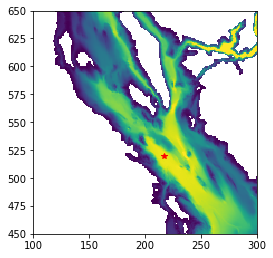

In [6]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(bathy)
ax.set_aspect(1)
ax.plot(217,520,'r*')
ax.set_xlim(100,300)
ax.set_ylim(450,650)

65.6875

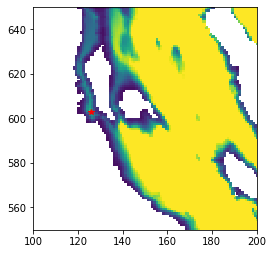

In [7]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(bathy,vmin=0,vmax=100)
ax.set_aspect(1)
ax.plot(217,520,'r*')
ax.set_xlim(100,200)
ax.set_ylim(550,650)
ax.plot(126,603,'r*')
bathy[603,126]

### Load and plot results

In [8]:
f18=nc.Dataset(os.path.join(saveloc,'profiles_CentralStrait_201812_i217_j520.nc'))
f19=nc.Dataset(os.path.join(saveloc,'profiles_CentralStrait_201905_i217_j520.nc'))
f20=nc.Dataset(os.path.join(saveloc,'profiles_CentralStrait_202007F_i217_j520.nc'))

In [9]:
f18.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'deptht', 'time_centered', 'time_counter', 'silicon', 'biogenic_silicon', 'nitrate', 'ammonium', 'particulate_organic_nitrogen', 'dissolved_organic_nitrogen', 'diatoms'])

In [10]:
f18.variables['silicon']

<class 'netCDF4._netCDF4.Variable'>
float32 silicon(time_counter, deptht)
    _FillValue: 1e+20
    standard_name: mole_concentration_of_silicate_in_sea_water
    long_name: Silicon Concentration
    units: mmol m-3
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 h
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    coordinates: time_centered deptht nav_lat nav_lon
    missing_value: 1e+20
unlimited dimensions: 
current shape = (26280, 40)
filling on

In [27]:
var='silicon'
np.shape(f18.variables[var])

(26280, 40)

In [28]:
np.shape(f19.variables[var])

(1095, 40)

In [29]:
np.shape(f20.variables[var])

(1095, 40)

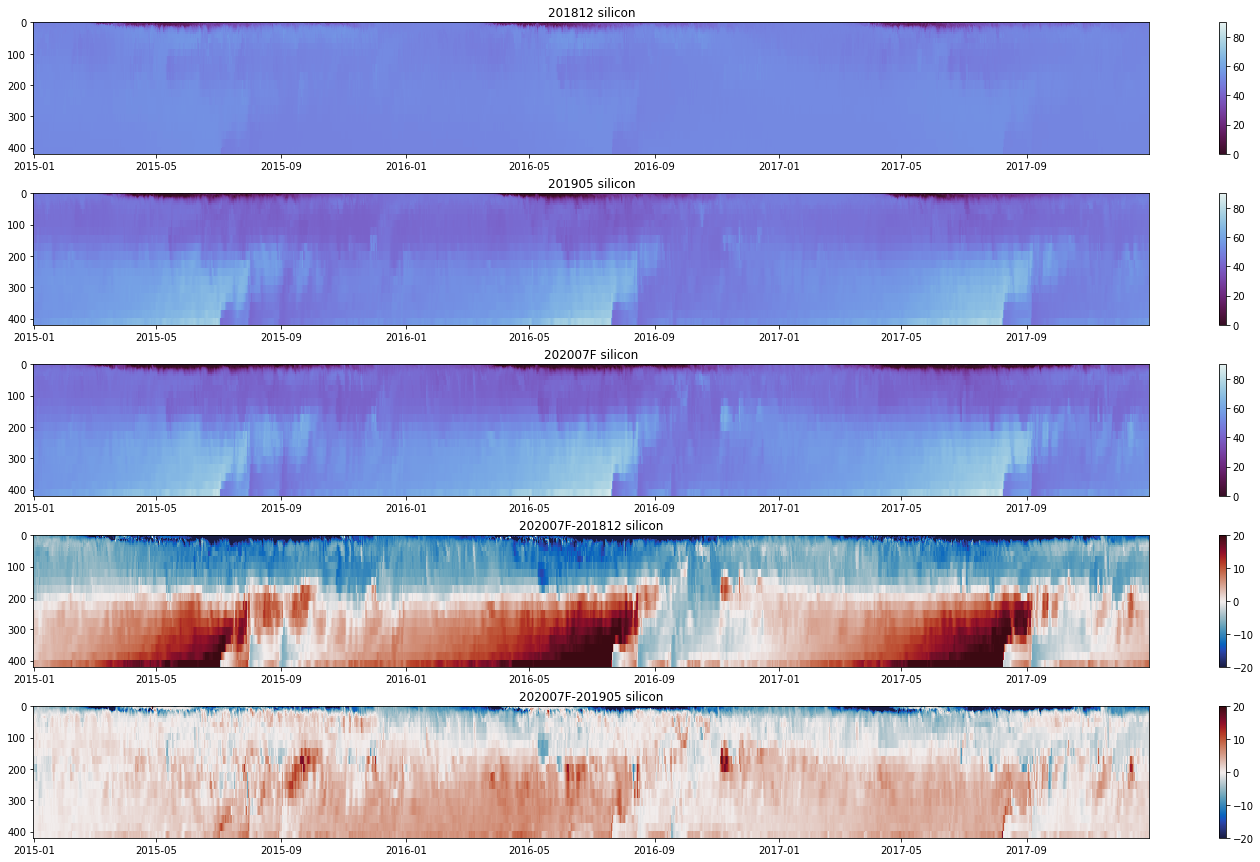

In [22]:
var='silicon'
cmin=0
cmax=90
dmin=-20
dmax=20
cm=cmo.cm.dense_r
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(25,15))
fig.subplots_adjust(hspace=.3)
x=[start_date+dt.timedelta(days=ii) for ii in range(0,int((end_date-start_date).days))]
y=f18.variables['deptht'][:]

m=ax1.pcolormesh(x,y,np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax1.set_title('201812 '+var)
fig.colorbar(m,ax=ax1)
m=ax2.pcolormesh(x,y,np.array(f19.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax2.set_title('201905 '+var)
fig.colorbar(m,ax=ax2)
m=ax3.pcolormesh(x,y,np.array(f20.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax3.set_title('202007F '+var)
fig.colorbar(m,ax=ax3)
cm2=cmocean.cm.balance
m=ax4.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax4.set_title('202007F-201812 '+var)
fig.colorbar(m,ax=ax4)
m=ax5.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f19.variables[var]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax5.set_title('202007F-201905 '+var)
fig.colorbar(m,ax=ax5)

for iax in (ax1,ax2,ax3,ax4,ax5):
    iax.set_ylim(420,0)

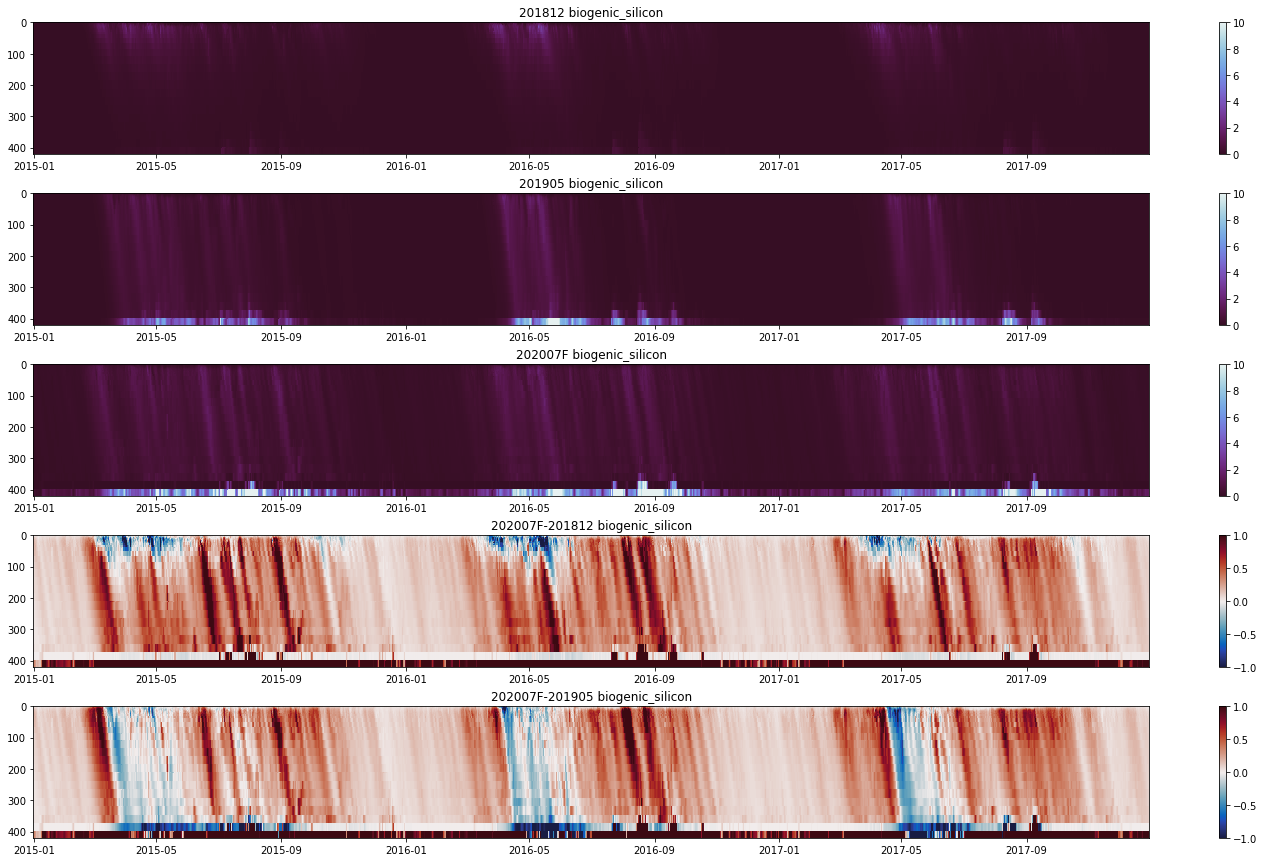

In [23]:
var='biogenic_silicon'
cmin=0
cmax=10
dmin=-1
dmax=1
cm=cmo.cm.dense_r
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(25,15))
fig.subplots_adjust(hspace=.3)
x=[start_date+dt.timedelta(days=ii) for ii in range(0,int((end_date-start_date).days))]
y=f18.variables['deptht'][:]

m=ax1.pcolormesh(x,y,np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax1.set_title('201812 '+var)
fig.colorbar(m,ax=ax1)
m=ax2.pcolormesh(x,y,np.array(f19.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax2.set_title('201905 '+var)
fig.colorbar(m,ax=ax2)
m=ax3.pcolormesh(x,y,np.array(f20.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax3.set_title('202007F '+var)
fig.colorbar(m,ax=ax3)
cm2=cmocean.cm.balance
m=ax4.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax4.set_title('202007F-201812 '+var)
fig.colorbar(m,ax=ax4)
m=ax5.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f19.variables[var]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax5.set_title('202007F-201905 '+var)
fig.colorbar(m,ax=ax5)

for iax in (ax1,ax2,ax3,ax4,ax5):
    iax.set_ylim(420,0)

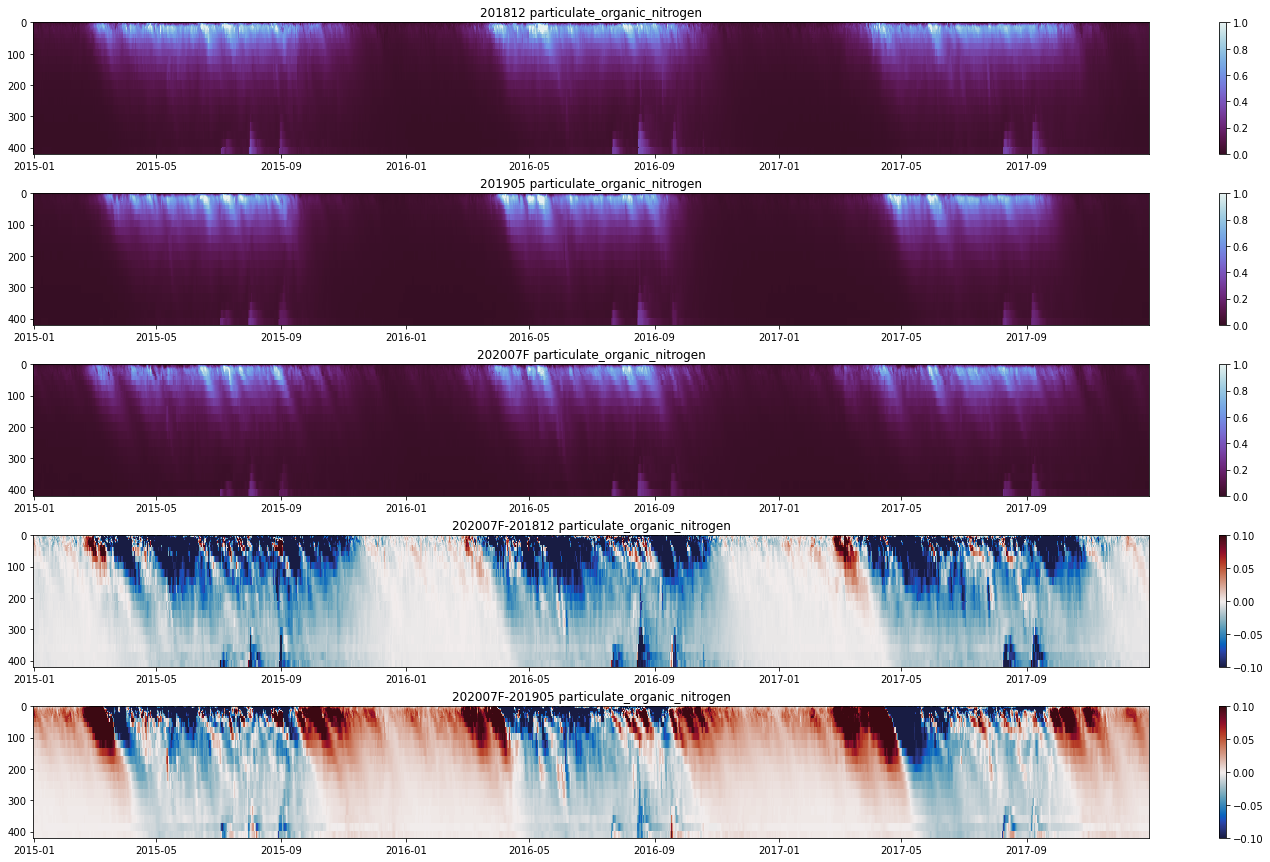

In [24]:
var='particulate_organic_nitrogen'
cmin=0
cmax=1
dmin=-.1
dmax=.1
cm=cmo.cm.dense_r
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(25,15))
fig.subplots_adjust(hspace=.3)
x=[start_date+dt.timedelta(days=ii) for ii in range(0,int((end_date-start_date).days))]
y=f18.variables['deptht'][:]

m=ax1.pcolormesh(x,y,np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax1.set_title('201812 '+var)
fig.colorbar(m,ax=ax1)
m=ax2.pcolormesh(x,y,np.array(f19.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax2.set_title('201905 '+var)
fig.colorbar(m,ax=ax2)
m=ax3.pcolormesh(x,y,np.array(f20.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax3.set_title('202007F '+var)
fig.colorbar(m,ax=ax3)
cm2=cmocean.cm.balance
m=ax4.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax4.set_title('202007F-201812 '+var)
fig.colorbar(m,ax=ax4)
m=ax5.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f19.variables[var]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax5.set_title('202007F-201905 '+var)
fig.colorbar(m,ax=ax5)

for iax in (ax1,ax2,ax3,ax4,ax5):
    iax.set_ylim(420,0)

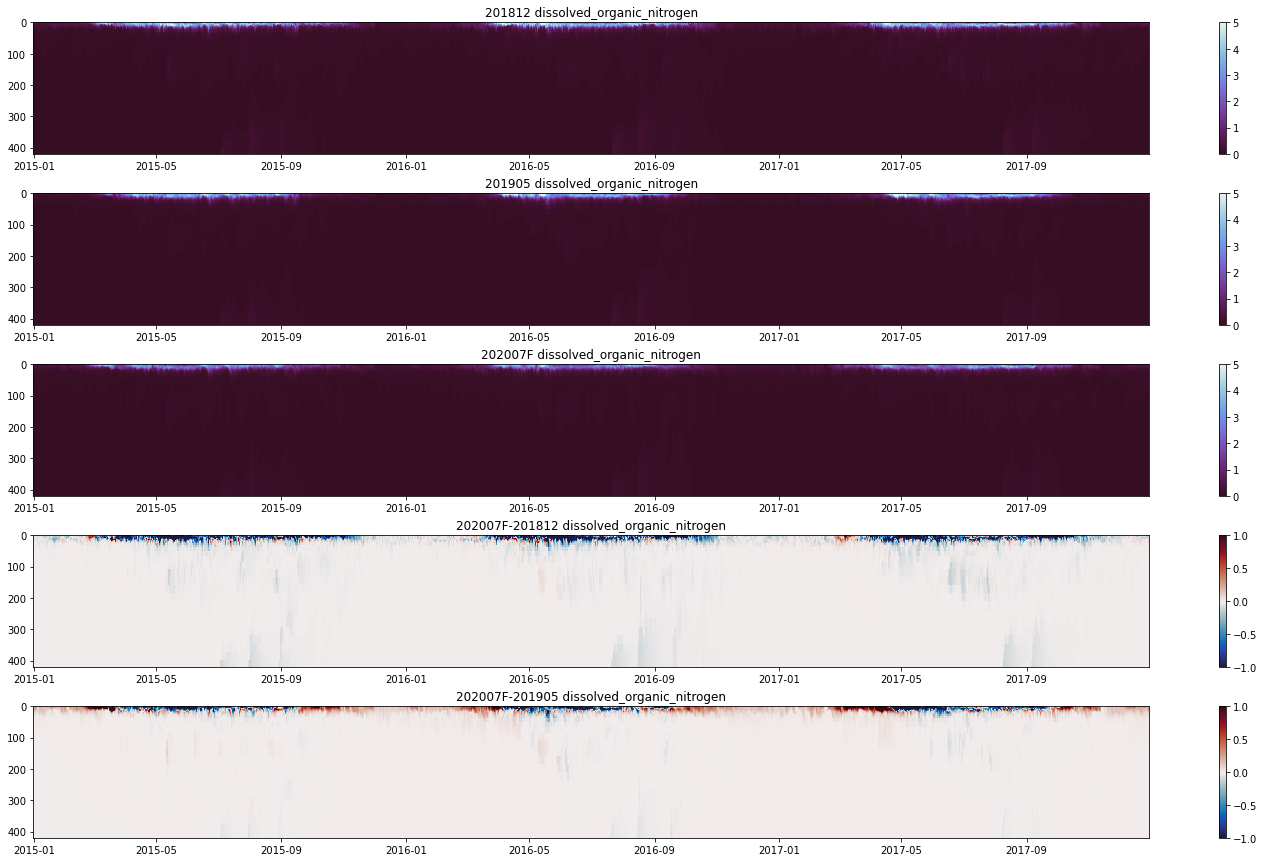

In [25]:
var='dissolved_organic_nitrogen'
cmin=0
cmax=5
dmin=-1
dmax=1
cm=cmo.cm.dense_r
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(25,15))
fig.subplots_adjust(hspace=.3)
x=[start_date+dt.timedelta(days=ii) for ii in range(0,int((end_date-start_date).days))]
y=f18.variables['deptht'][:]

m=ax1.pcolormesh(x,y,np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax1.set_title('201812 '+var)
fig.colorbar(m,ax=ax1)
m=ax2.pcolormesh(x,y,np.array(f19.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax2.set_title('201905 '+var)
fig.colorbar(m,ax=ax2)
m=ax3.pcolormesh(x,y,np.array(f20.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax3.set_title('202007F '+var)
fig.colorbar(m,ax=ax3)
cm2=cmocean.cm.balance
m=ax4.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax4.set_title('202007F-201812 '+var)
fig.colorbar(m,ax=ax4)
m=ax5.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f19.variables[var]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax5.set_title('202007F-201905 '+var)
fig.colorbar(m,ax=ax5)

for iax in (ax1,ax2,ax3,ax4,ax5):
    iax.set_ylim(420,0)

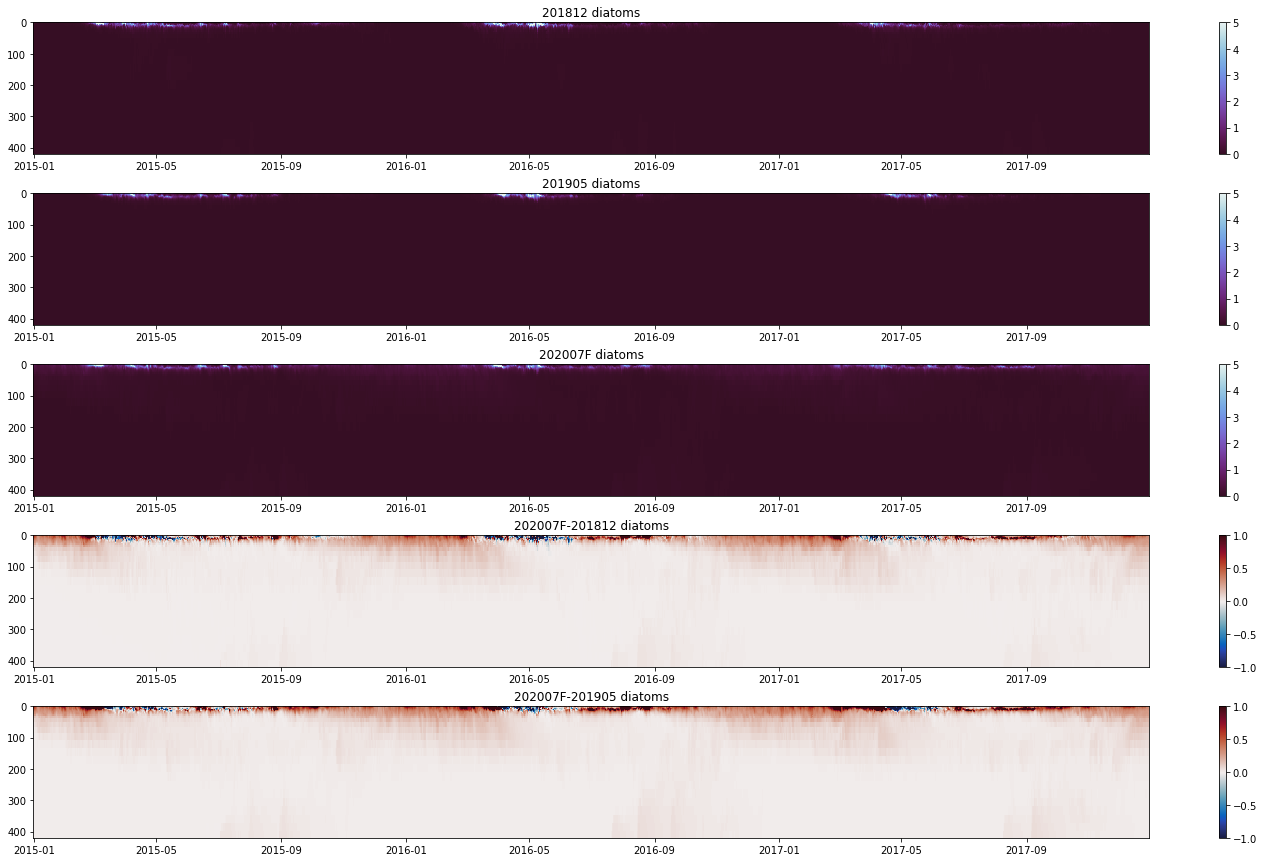

In [26]:
var='diatoms'
cmin=0
cmax=5
dmin=-1
dmax=1
cm=cmo.cm.dense_r
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(25,15))
fig.subplots_adjust(hspace=.3)
x=[start_date+dt.timedelta(days=ii) for ii in range(0,int((end_date-start_date).days))]
y=f18.variables['deptht'][:]

m=ax1.pcolormesh(x,y,np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax1.set_title('201812 '+var)
fig.colorbar(m,ax=ax1)
m=ax2.pcolormesh(x,y,np.array(f19.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax2.set_title('201905 '+var)
fig.colorbar(m,ax=ax2)
m=ax3.pcolormesh(x,y,np.array(f20.variables[var]).T,shading='nearest',cmap=cm,vmin=cmin,vmax=cmax)
ax3.set_title('202007F '+var)
fig.colorbar(m,ax=ax3)
cm2=cmocean.cm.balance
m=ax4.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f18.variables[var][::24,:]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax4.set_title('202007F-201812 '+var)
fig.colorbar(m,ax=ax4)
m=ax5.pcolormesh(x,y,np.array(f20.variables[var]).T-np.array(f19.variables[var]).T,shading='nearest',cmap=cm2,vmin=dmin,vmax=dmax)
ax5.set_title('202007F-201905 '+var)
fig.colorbar(m,ax=ax5)

for iax in (ax1,ax2,ax3,ax4,ax5):
    iax.set_ylim(420,0)